In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
#import yfinance as yf
import pandas_datareader.data as web
#yf.pdr_override
import warnings

def analyse(X, cutoff = 0.05):
    # Ho root unitary test (non stationary)
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print(f'p-value = {pvalue} Serie = {X.name} is stationary')
        return True
    else:
        print(f'p-value = {pvalue} Serie = {X.name} isnt stationary')
        return False

plt.style.available

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.rcParams['figure.figsize'] = (50,15)
plt.style.use('dark_background')

In [3]:
data = pd.read_csv('/content/prices.csv')
data.head()

,Unnamed: 0,EURCHF,EURGBP,EURJPY,EURNZD,EURUSD,EURAUD,EURCAD,GBPCHF,GBPJPY,GBPNZD,GBPCAD,GBPAUD,GBPUSD,CHFJPY,NZDCHF,CADCHF,AUDCHF,USDCHF,NZDJPY,CADJPY,AUDJPY,USDJPY,NZDCAD,AUDNZD,NZDUSD,AUDCAD,USDCAD,AUDUSD
0,0,1.48334,0.88680,132.757,1.97720,1.43153,1.59509,1.49880,1.67200,149.647,2.05884,1.68973,1.79811,1.61368,89.460,0.74795,0.98892,0.92928,1.03608,66.989,88.512,83.188,92.737,0.75680,1.23900,0.72333,0.93934,1.04724,0.89711
1,1,1.48250,0.88618,132.730,1.97922,1.42886,1.59346,1.49949,1.67232,149.725,2.06112,1.69184,1.79764,1.61182,89.493,0.74758,0.98785,0.92970,1.03741,66.906,88.446,83.256,92.890,0.75514,1.24136,0.72131,0.94071,1.04968,0.89632
2,2,1.48294,0.88675,132.680,1.98094,1.42705,1.59382,1.49738,1.67177,149.571,2.06123,1.68842,1.79680,1.60877,89.432,0.74681,0.98955,0.92981,1.03908,66.897,88.533,83.205,92.973,0.75278,1.24220,0.71978,0.93925,1.04956,0.89500
3,3,1.48239,0.88706,132.743,1.98214,1.42939,1.59439,1.49367,1.67060,149.591,2.05594,1.68370,1.79704,1.61087,89.505,0.74687,0.99164,0.92911,1.03698,66.800,88.797,83.214,92.862,0.75371,1.24247,0.72050,0.93653,1.04523,0.89613
4,4,1.48181,0.88758,132.490,1.98134,1.42848,1.59304,1.49487,1.66884,149.212,2.05346,1.68365,1.79398,1.60880,89.371,0.74737,0.99047,0.92956,1.03724,66.842,88.559,83.128,92.746,0.75400,1.24304,0.72036,0.93809,1.04671,0.89633


In [4]:
data.isnull().sum()

Unnamed: 0       0
EURCHF           0
EURGBP           0
EURJPY           0
EURNZD           0
EURUSD           0
EURAUD           0
EURCAD           0
GBPCHF           0
GBPJPY           0
GBPNZD        5479
GBPCAD           0
GBPAUD           0
GBPUSD           0
CHFJPY           0
NZDCHF         157
CADCHF           0
AUDCHF           0
USDCHF           0
NZDJPY           0
CADJPY           0
AUDJPY           0
USDJPY           0
NZDCAD         646
AUDNZD           0
NZDUSD           0
AUDCAD           0
USDCAD           0
AUDUSD           0
dtype: int64

In [5]:
data['GBPNZD'].isnull().sum()

5479

In [6]:
data['GBPNZD'].mean(), data['GBPNZD'].median()

(1.9768229756556273, 1.957205)

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Unnamed: 0    0
EURCHF        0
EURGBP        0
EURJPY        0
EURNZD        0
EURUSD        0
EURAUD        0
EURCAD        0
GBPCHF        0
GBPJPY        0
GBPNZD        0
GBPCAD        0
GBPAUD        0
GBPUSD        0
CHFJPY        0
NZDCHF        0
CADCHF        0
AUDCHF        0
USDCHF        0
NZDJPY        0
CADJPY        0
AUDJPY        0
USDJPY        0
NZDCAD        0
AUDNZD        0
NZDUSD        0
AUDCAD        0
USDCAD        0
AUDUSD        0
dtype: int64

In [8]:
data.describe

<bound method NDFrame.describe of        Unnamed: 0   EURCHF   EURGBP  ...   AUDCAD   USDCAD   AUDUSD
0               0  1.48334  0.88680  ...  0.93934  1.04724  0.89711
1               1  1.48250  0.88618  ...  0.94071  1.04968  0.89632
2               2  1.48294  0.88675  ...  0.93925  1.04956  0.89500
3               3  1.48239  0.88706  ...  0.93653  1.04523  0.89613
4               4  1.48181  0.88758  ...  0.93809  1.04671  0.89633
...           ...      ...      ...  ...      ...      ...      ...
62761       62761  1.06117  0.83388  ...  0.89247  1.32482  0.66762
62762       62762  1.06088  0.83333  ...  0.89236  1.32519  0.66793
62763       62763  1.06072  0.83416  ...  0.89280  1.32476  0.66844
62764       62764  1.06075  0.83309  ...  0.89292  1.32464  0.66792
62765       62765  1.06136  0.83093  ...  0.89184  1.32452  0.66814

[62766 rows x 29 columns]>

In [9]:
data['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
62761    62761
62762    62762
62763    62763
62764    62764
62765    62765
Name: Unnamed: 0, Length: 62766, dtype: int64

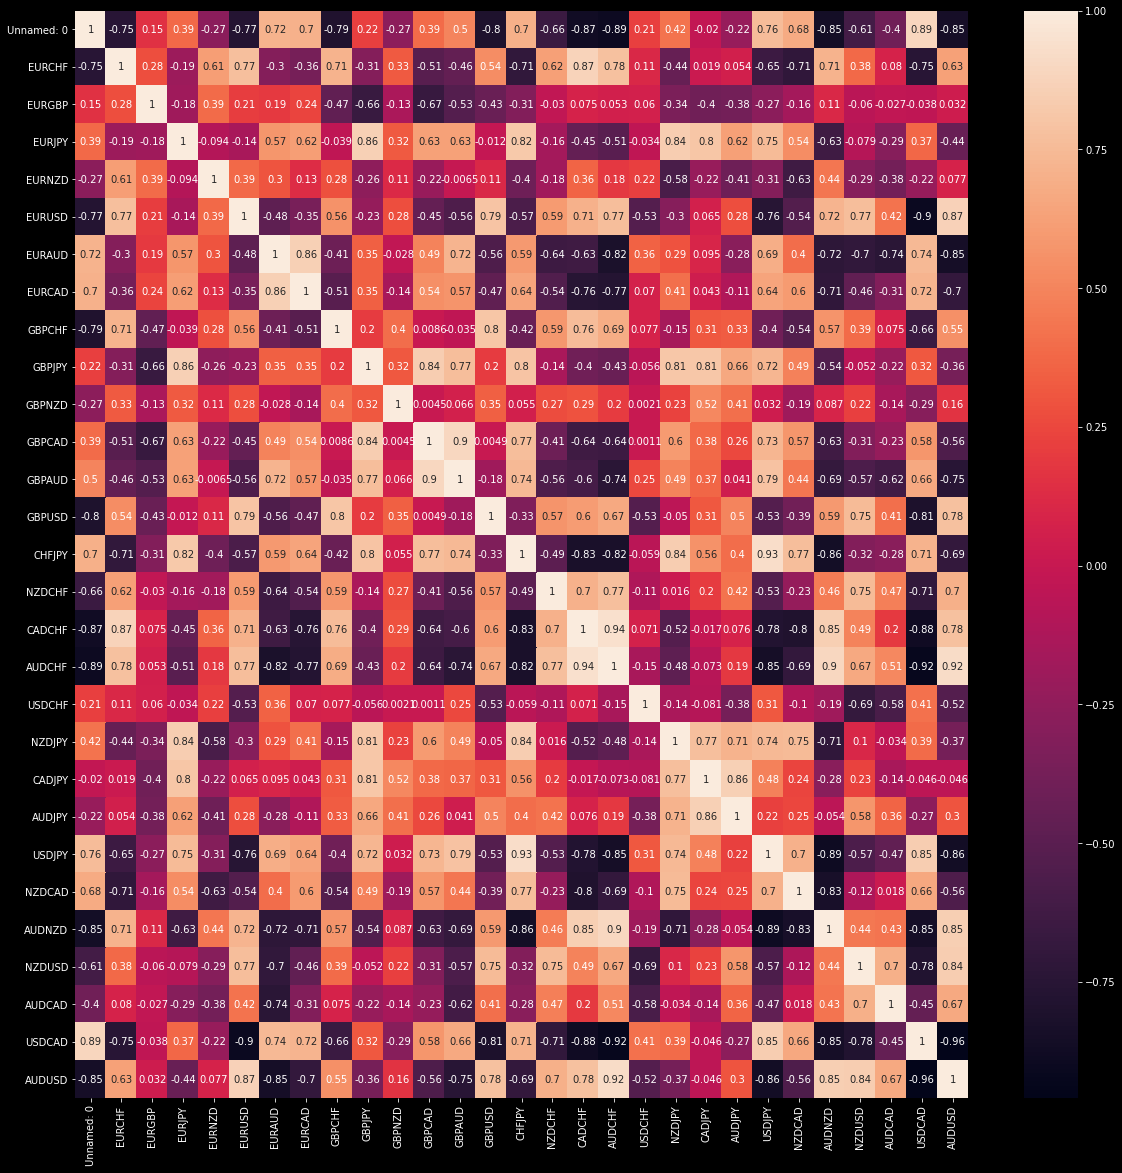

In [10]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=data.corr(),annot=True,ax=ax)

In [11]:
data.drop(columns=(['Unnamed: 0']),inplace=True)

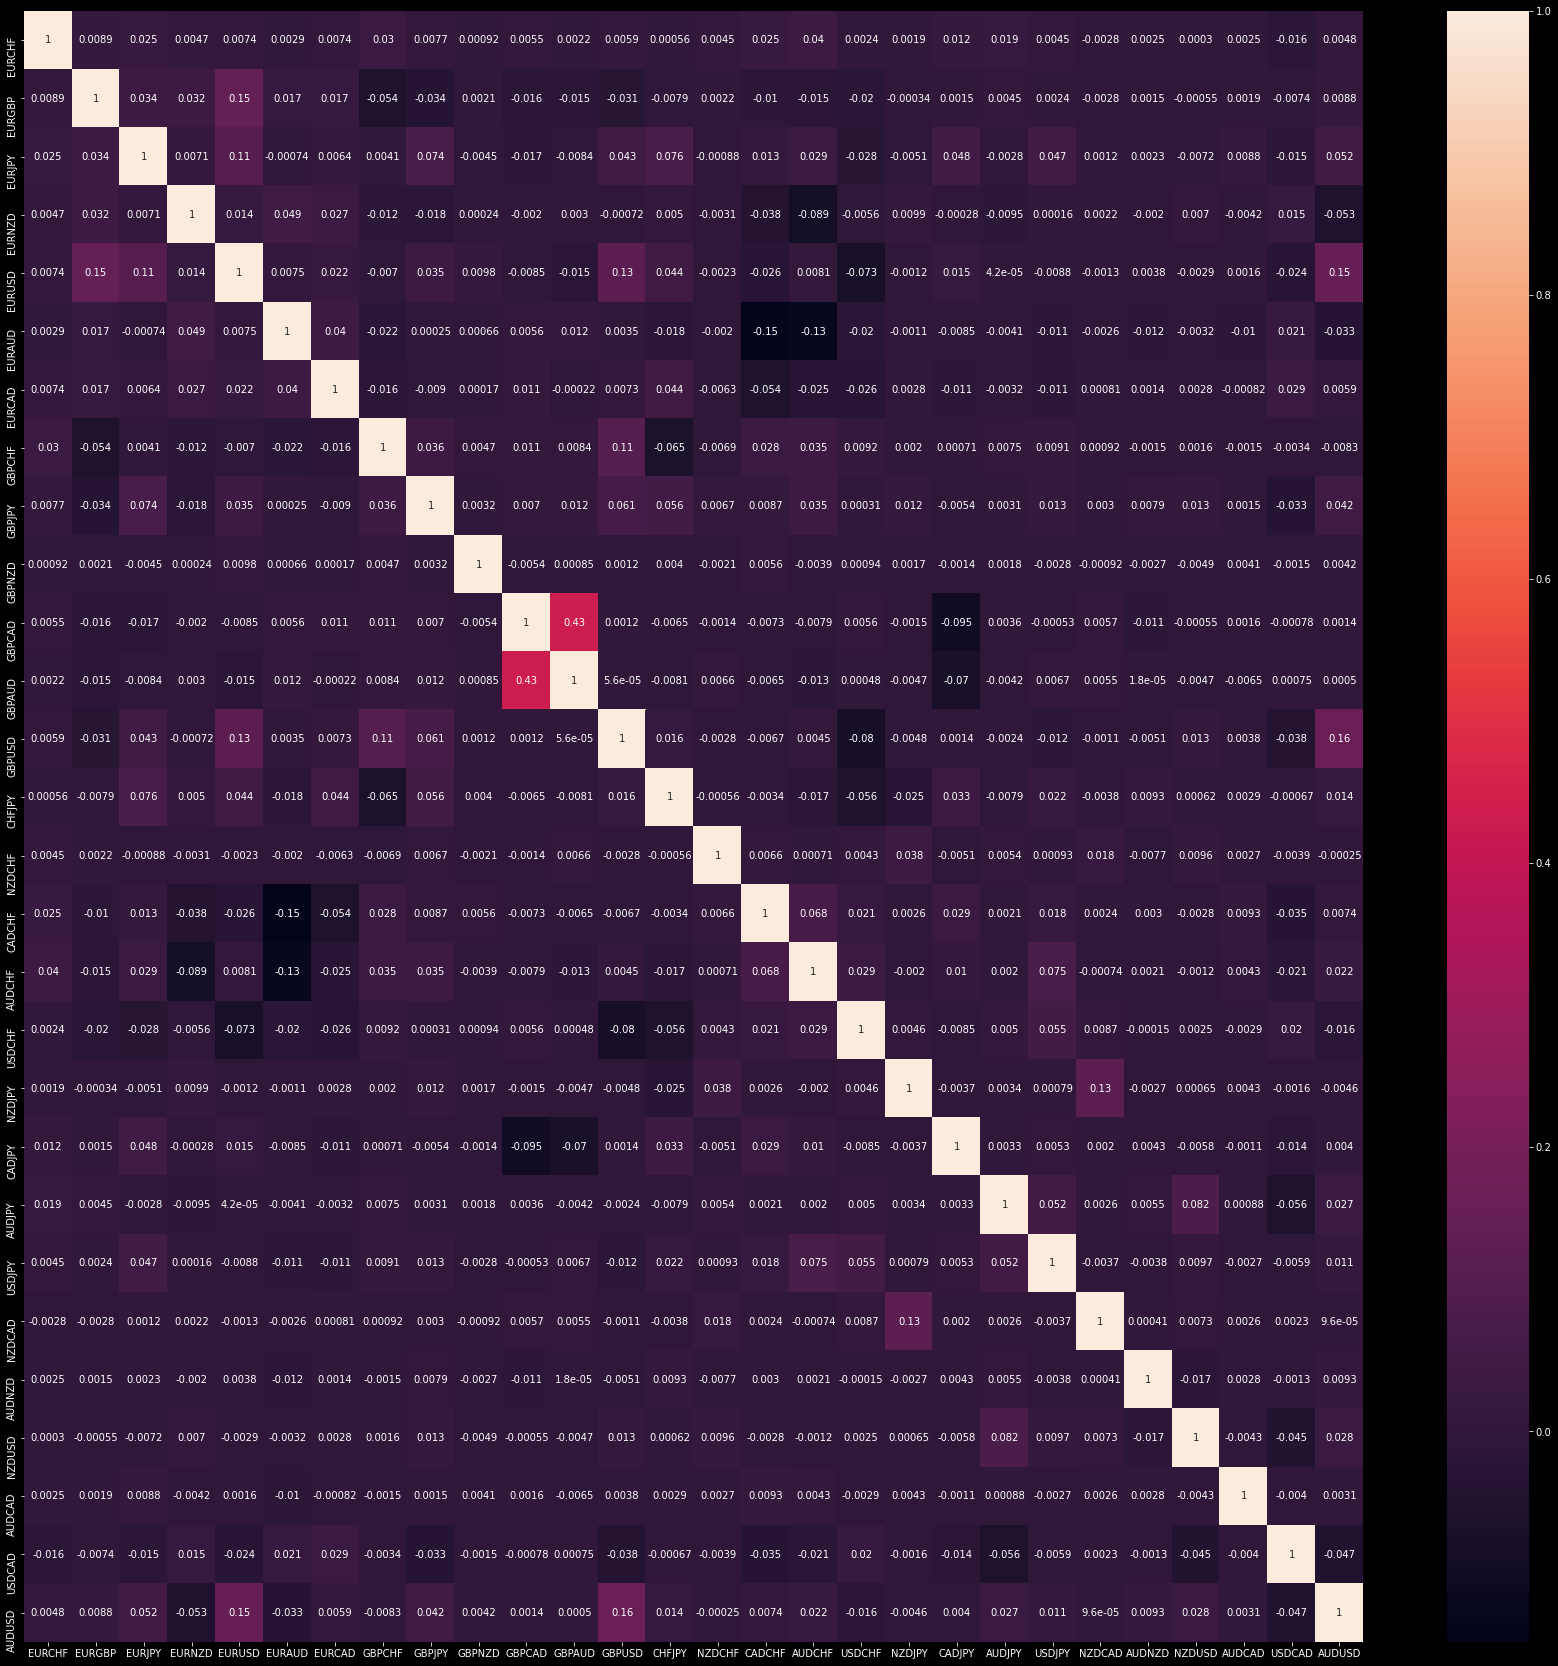

In [12]:
a4_dims = (30, 30)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data=data.diff().corr(),annot=True,ax=ax)

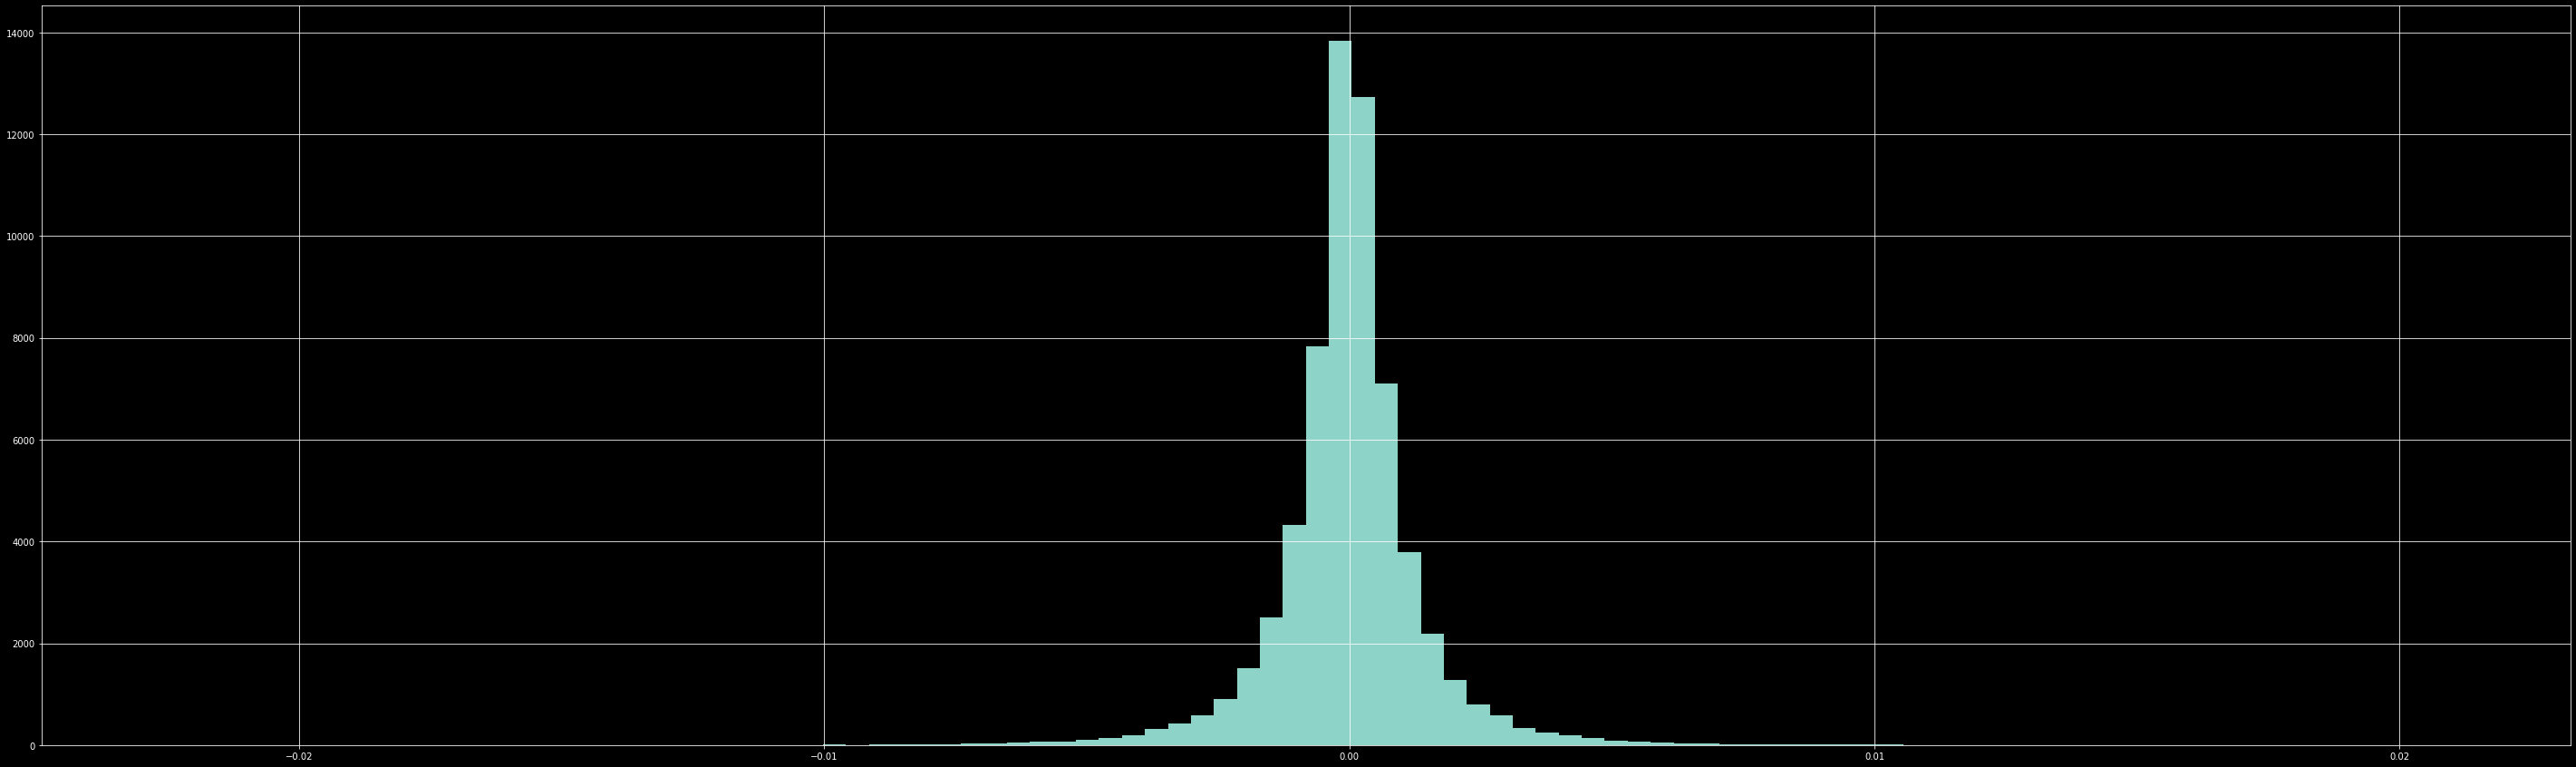

In [13]:
data['EURUSD'].diff().hist(bins=100)

In [14]:
df = pd.read_csv('/content/eur.csv',sep='\t')
df.isna().sum()

<DATE>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64

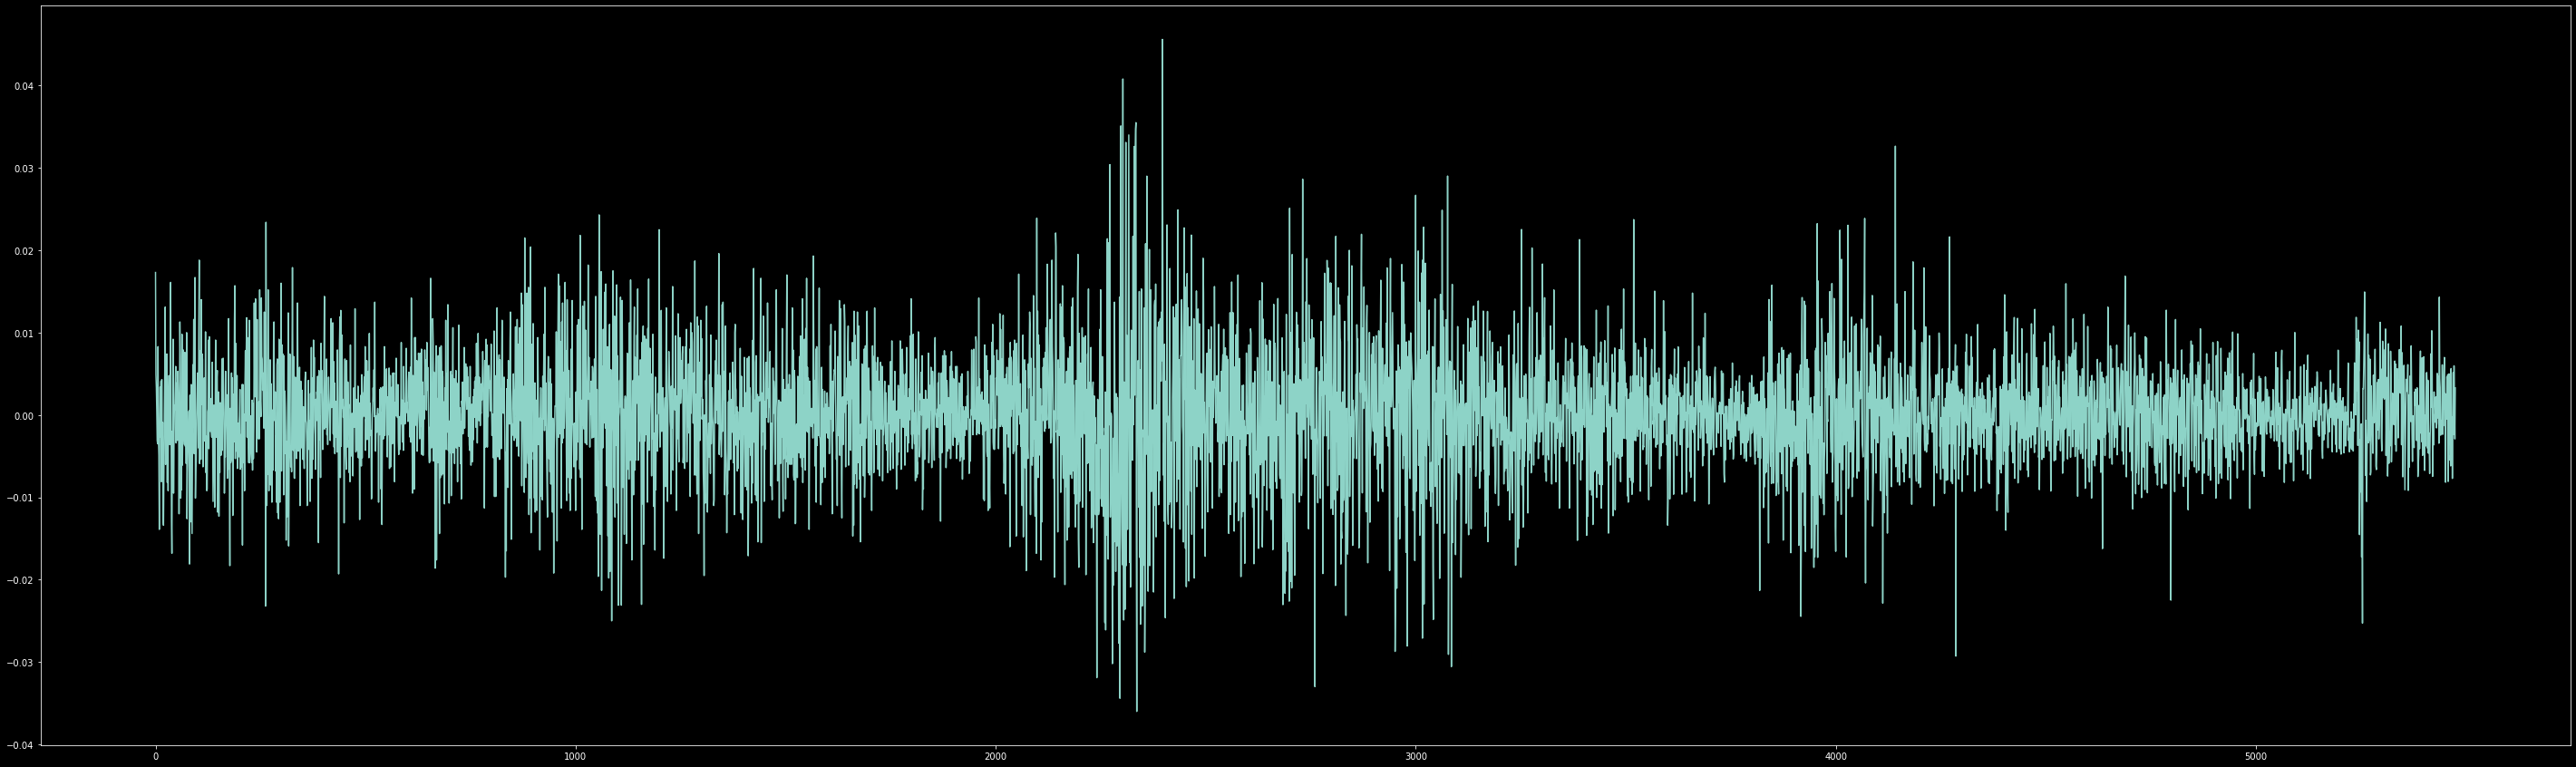

In [15]:
df['dif'] = df['<CLOSE>'] - df['<OPEN>']
df['dif'].plot()

In [16]:
df['smadif']=df['dif'].rolling(20,min_periods=1).mean()

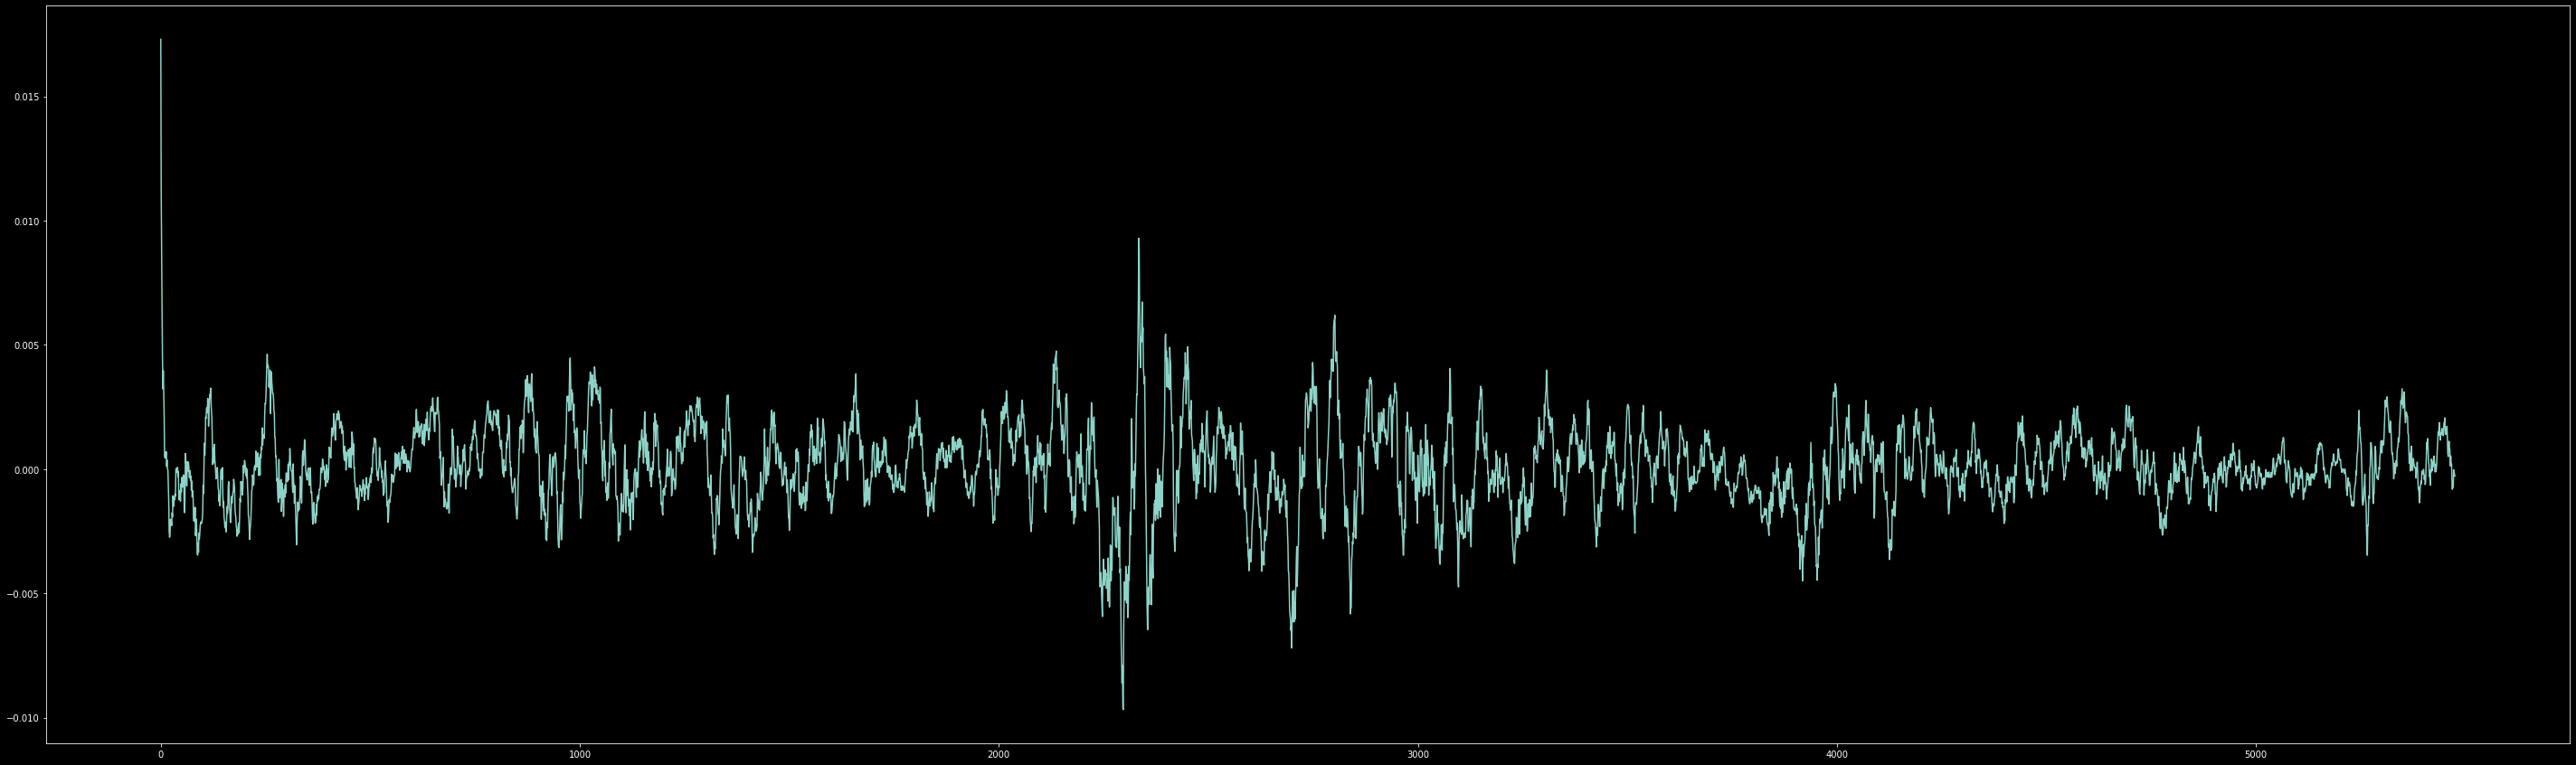

In [17]:
df['smadif'].plot()

In [21]:
len(df)

5476

In [27]:
for i in range(10):
  print(df['<CLOSE>'].iloc[i])

1.0246
1.0292
1.0326
1.033
1.0298
1.0251
1.0336
1.0308
1.026
1.0122


In [29]:
df.iloc[9,4]

1.0122

In [ ]:
"""
usar um loop para percorrer todo o data frame
Se o par x estiver sobre vendido ou sobre comprado, devo vende lo com o y no preço tal
quando cair x valores devo finalizar a compra/venda
contar a quantidade de pips ganhos
"""

In [30]:
df.rolling(20).sum()


,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,dif,smadif
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5471,24.40642,24.48241,24.32948,24.39180,1465787.0,0.0,0.0,-0.01462,0.012013
5472,24.39251,24.47400,24.32450,24.39204,1451655.0,0.0,0.0,-0.00047,0.010582
5473,24.39219,24.47082,24.32425,24.39048,1429206.0,0.0,0.0,-0.00171,0.009093
5474,24.39066,24.46758,24.31811,24.38653,1435819.0,0.0,0.0,-0.00413,0.007490
